In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cmcrameri import cm

from plot_utils import rcparams
plt.rcParams.update(rcparams)

In [2]:
weighted_quantiles = np.loadtxt('weighted_quantiles/weighted_quantiles_p_e.dat')

weighted_quantiles_combined_5 = np.loadtxt('weighted_quantiles/weighted_quantiles_combined_p_e_05.dat')
weighted_quantiles_combined_7 = np.loadtxt('weighted_quantiles/weighted_quantiles_combined_p_e_07.dat')
weighted_quantiles_combined_10 = np.loadtxt('weighted_quantiles/weighted_quantiles_combined_p_e_10.dat')

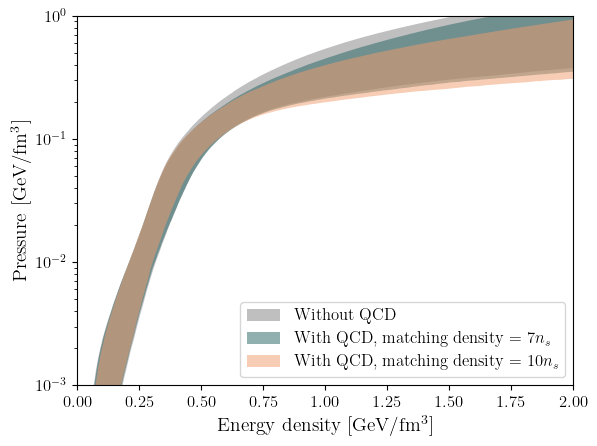

In [3]:
energy_density_grid = np.linspace(1e-10, 5, 1000)

fig, ax = plt.subplots()
ax.set_yscale('log')
    
ax.fill_between(
    energy_density_grid, 
    weighted_quantiles[0], 
    weighted_quantiles[2], 
    alpha=0.25, 
    color='k', 
    edgecolor=None,
    label='Without QCD'
    )

ax.fill_between(
    energy_density_grid, 
    weighted_quantiles_combined_7[0], 
    weighted_quantiles_combined_7[2], 
    alpha=0.5, 
    color=cm.batlow(0.25), 
    edgecolor=None,
    label='With QCD, matching density $=7n_s$'
    )

ax.fill_between(
    energy_density_grid, 
    weighted_quantiles_combined_10[0], 
    weighted_quantiles_combined_10[2], 
    alpha=0.5, 
    color=cm.batlow(0.75), 
    edgecolor=None,
    label='With QCD, matching density $=10n_s$'
    )

ax.legend(loc='lower right')

ax.set_ylim(1e-3, 1)
ax.set_xlim(0., 2)

ax.set_xlabel('Energy density [GeV/fm$^3$]')
ax.set_ylabel('Pressure [GeV/fm$^3$]')

fig.savefig('pressure_vs_energy_density.pdf', bbox_inches='tight')